### ***Step one***

[-10.          -9.746836    -9.49367     -9.240506    -8.987342
  -8.734178    -8.481012    -8.227848    -7.974684    -7.721519
  -7.468354    -7.21519     -6.962025    -6.708861    -6.455696
  -6.202532    -5.949367    -5.6962023   -5.443038    -5.189873
  -4.936709    -4.683544    -4.43038     -4.177215    -3.9240506
  -3.670886    -3.4177215   -3.164557    -2.9113922   -2.6582277
  -2.4050632   -2.1518986   -1.8987341   -1.6455696   -1.392405
  -1.1392404   -0.88607585  -0.6329113   -0.37974674  -0.12658218
   0.12658218   0.37974674   0.6329113    0.88607585   1.1392404
   1.392405     1.6455696    1.8987341    2.1518986    2.4050632
   2.6582277    2.9113922    3.164557     3.4177215    3.670886
   3.9240506    4.177215     4.43038      4.683544     4.936709
   5.189873     5.443038     5.6962023    5.949367     6.202532
   6.455696     6.708861     6.962025     7.21519      7.468354
   7.721519     7.974684     8.227848     8.481012     8.734178
   8.987342     9.240506     9.493

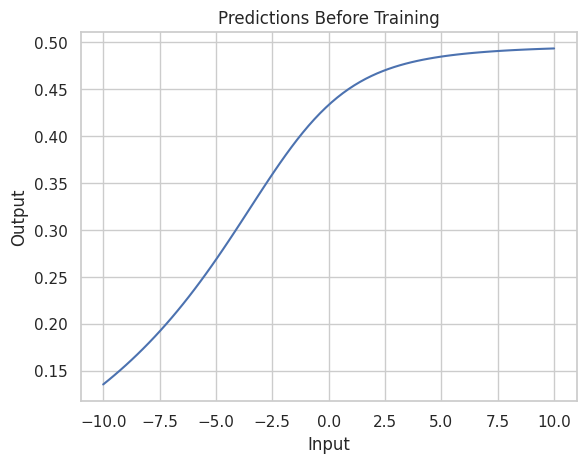

In [62]:
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sns
import pandas as pd
# Neural Network Definition
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.w00 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.b00 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w01 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.b01 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w02 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.b02 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w11 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w13 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w20 = nn.Parameter(torch.rand(1), requires_grad=False)





    def forward(self, x):
        h1 = torch.sigmoid(self.w00 * x + self.b00) * self.w11
        h2 = torch.sigmoid(self.w01 * x + self.b01) * self.w12
        h3 = torch.sigmoid(self.w02 * x + self.b02) * self.w13
        # Output layer with Tanh activation
        output = torch.tanh(h1 + h2 + h3) * self.w20
        return output

input_data = torch.linspace(start=-10,end=10,steps=80).detach().numpy()
print(input_data)

net = SimpleNN()
initial_predictions = net(input_data).detach().numpy()
print(initial_predictions)

sns.lineplot(x=input_data, y=initial_predictions)
plt.title("Predictions Before Training")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()


Epoch [10/100], Loss: 0.5264
Epoch [20/100], Loss: 0.5235
Epoch [30/100], Loss: 0.5210
Epoch [40/100], Loss: 0.5190
Epoch [50/100], Loss: 0.5173
Epoch [60/100], Loss: 0.5159
Epoch [70/100], Loss: 0.5147
Epoch [80/100], Loss: 0.5137
Epoch [90/100], Loss: 0.5129
Epoch [100/100], Loss: 0.5122


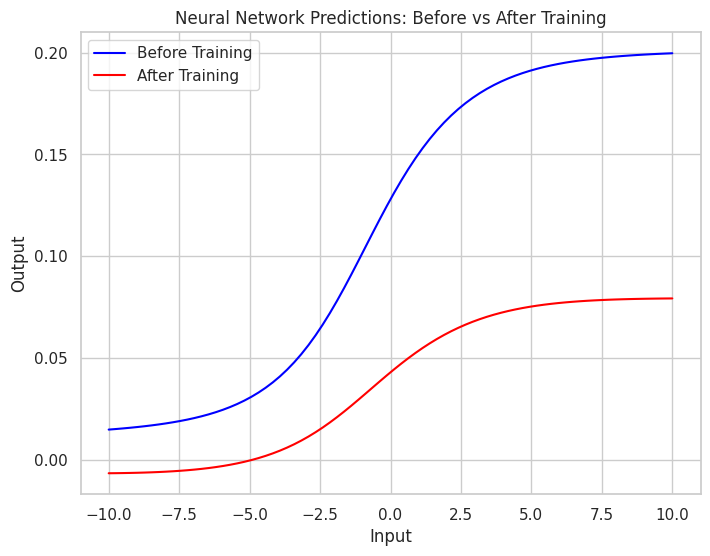

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


class TrainableNN(nn.Module):
    def __init__(self):
        super(TrainableNN, self).__init__()
        # Weights and biases now trainable
        self.w00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w01 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b01 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w02 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b02 = nn.Parameter(torch.rand(1), requires_grad=True)

        self.w11 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w13 = nn.Parameter(torch.rand(1), requires_grad=True)

        self.w20 = nn.Parameter(torch.rand(1), requires_grad=True)

    def forward(self, x):
        h1 = torch.sigmoid(self.w00 * x + self.b00) * self.w11
        h2 = torch.sigmoid(self.w01 * x + self.b01) * self.w12
        h3 = torch.sigmoid(self.w02 * x + self.b02) * self.w13
        output = torch.tanh(h1 + h2 + h3) * self.w20
        return output

trainable_nn = TrainableNN()

# Define optimizer and loss function
optimizer = torch.optim.SGD(trainable_nn.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

X=torch.linspace(start=-10,end=10,steps=80)
# Generate target data Y (e.g., a sine wave)
Y = torch.sin(X * 3)

# Get predictions before training
initial_predictions = trainable_nn(X)

epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()  # Clear previous gradients
    predictions = trainable_nn(X)  # Forward pass
    loss = loss_fn(predictions, Y)  # Calculate loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Print the total loss after each epoch
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Updated predictions after training
final_predictions = trainable_nn(X)

# Plot predictions before and after training
plt.figure(figsize=(8, 6))
sns.lineplot(x=X.detach().numpy(), y=initial_predictions.detach().numpy(), color='blue', label='Before Training')
sns.lineplot(x=X.detach().numpy(), y=final_predictions.detach().numpy(), color='red', label='After Training')
plt.title("Neural Network Predictions: Before vs After Training")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()